# A quick test of p-DTW

Let us start by defining useful bits...
NB: Time series are taken from 50words train set (UCR datasets).

In [1]:
%matplotlib inline
import numpy
import pylab

from py.p_dtw import p_dtw, p_dtw_backtrace

s_x = numpy.array([-7.9041907e-001, -7.6517067e-001, -7.3354192e-001, -6.9963343e-001, -6.6773990e-001, -6.3863252e-001,
                   -6.1180824e-001, -5.8728213e-001, -5.6430137e-001, -5.4438116e-001, -5.2935343e-001, -5.1750211e-001,
                   -5.0886727e-001, -5.0227876e-001, -4.9418748e-001, -4.8776688e-001, -4.8243639e-001, -4.7509291e-001,
                   -4.7221693e-001, -4.6985034e-001, -4.6458592e-001, -4.6352343e-001, -4.6142804e-001, -4.5761020e-001,
                   -4.5909288e-001, -4.6013627e-001, -4.5922559e-001, -4.5787671e-001, -4.4818572e-001, -4.3071135e-001,
                   -4.0775787e-001, -3.7470450e-001, -3.3276406e-001, -2.7680396e-001, -1.9645398e-001, -9.0298441e-002,
                   4.7421453e-002, 2.2049558e-001, 4.2610361e-001, 6.7132644e-001, 9.6248352e-001, 1.3001520e+000,
                   1.6832044e+000, 2.0961073e+000, 2.5103437e+000, 2.8950931e+000, 3.2193575e+000, 3.4627502e+000,
                   3.6209759e+000, 3.6996185e+000, 3.7128996e+000, 3.6774581e+000, 3.6058883e+000, 3.5102093e+000,
                   3.3997355e+000, 3.2801471e+000, 3.1583924e+000, 3.0381276e+000, 2.9193476e+000, 2.8006421e+000,
                   2.6759728e+000, 2.5378207e+000, 2.3816771e+000, 2.2061284e+000, 2.0161922e+000, 1.8207789e+000,
                   1.6266062e+000, 1.4393082e+000, 1.2597058e+000, 1.0846672e+000, 9.1676268e-001, 7.5765525e-001,
                   6.0807585e-001, 4.7629319e-001, 3.6105720e-001, 2.5887282e-001, 1.7308743e-001, 9.6470901e-002,
                   2.6893708e-002, -3.2235560e-002, -8.7307355e-002, -1.3689786e-001, -1.7931348e-001, -2.2132750e-001,
                   -2.5954886e-001, -2.9337686e-001, -3.2833837e-001, -3.5883947e-001, -3.8533967e-001, -4.1341732e-001,
                   -4.3700113e-001, -4.5785304e-001, -4.8018824e-001, -4.9755043e-001, -5.1223386e-001, -5.2641307e-001,
                   -5.3600246e-001, -5.4404561e-001, -5.5163961e-001, -5.5637762e-001, -5.6113386e-001, -5.6548881e-001,
                   -5.6758832e-001, -5.6959311e-001, -5.6965820e-001, -5.6603235e-001, -5.6025886e-001, -5.4948076e-001,
                   -5.3220073e-001, -5.0995844e-001, -4.8014676e-001, -4.4343151e-001, -4.0240422e-001, -3.5674879e-001,
                   -3.0783143e-001, -2.5630061e-001, -2.0003657e-001, -1.3875290e-001, -7.2699835e-002, -2.8484367e-003,
                   6.6369127e-002, 1.3058510e-001, 1.8612463e-001, 2.2914710e-001, 2.5895140e-001, 2.7589944e-001,
                   2.7963466e-001, 2.7232154e-001, 2.5625046e-001, 2.3374145e-001, 2.0940933e-001, 1.8571945e-001,
                   1.6233944e-001, 1.3868590e-001, 1.1208860e-001, 8.0643694e-002, 4.5686474e-002, 7.8176486e-003,
                   -3.1699830e-002, -7.0879361e-002, -1.0997320e-001, -1.4719217e-001, -1.8032289e-001, -2.0995324e-001,
                   -2.3490907e-001, -2.5589810e-001, -2.7537219e-001, -2.9211560e-001, -3.0676437e-001, -3.2039142e-001,
                   -3.3220876e-001, -3.4380844e-001, -3.5484313e-001, -3.6276972e-001, -3.6672638e-001, -3.6360888e-001,
                   -3.5115612e-001, -3.3013439e-001, -2.9944111e-001, -2.6041452e-001, -2.1723621e-001, -1.7179645e-001,
                   -1.2815208e-001, -9.0836343e-002, -5.9734887e-002, -3.6371634e-002, -2.1981298e-002, -1.5890106e-002,
                   -2.0297528e-002, -3.6848721e-002, -6.4751740e-002, -1.0373446e-001, -1.5089977e-001, -2.0148616e-001,
                   -2.5293094e-001, -3.0207510e-001, -3.4682678e-001, -3.8840782e-001, -4.2620087e-001, -4.5982499e-001,
                   -4.9065951e-001, -5.1697612e-001, -5.3882444e-001, -5.5823452e-001, -5.7462167e-001, -5.8841609e-001,
                   -5.9955491e-001, -6.0571570e-001, -6.0697561e-001, -6.0414853e-001, -5.9770612e-001, -5.8913275e-001,
                   -5.7675455e-001, -5.5773489e-001, -5.3127907e-001, -4.9612068e-001, -4.5409957e-001, -4.0952576e-001,
                   -3.6356431e-001, -3.1830811e-001, -2.7612295e-001, -2.3687167e-001, -2.0281675e-001, -1.7610459e-001,
                   -1.5669304e-001, -1.4539933e-001, -1.4200161e-001, -1.4501179e-001, -1.5404540e-001, -1.6792038e-001,
                   -1.8514938e-001, -2.0585993e-001, -2.2969283e-001, -2.5635975e-001, -2.8637844e-001, -3.1835697e-001,
                   -3.5073517e-001, -3.8311750e-001, -4.1367390e-001, -4.4168825e-001, -4.6729507e-001, -4.8927889e-001,
                   -5.0759369e-001, -5.2278845e-001, -5.3471219e-001, -5.4437693e-001, -5.5209433e-001, -5.5728151e-001,
                   -5.6031352e-001, -5.6033488e-001, -5.5690388e-001, -5.5111378e-001, -5.4235654e-001, -5.3119043e-001,
                   -5.1936578e-001, -5.0656079e-001, -4.9433549e-001, -4.8419196e-001, -4.7553422e-001, -4.6873425e-001,
                   -4.6285870e-001, -4.5628811e-001, -4.4930162e-001, -4.4202663e-001, -4.3525796e-001, -4.3085639e-001,
                   -4.2918720e-001, -4.3046546e-001, -4.3509043e-001, -4.4231477e-001, -4.5207540e-001, -4.6455129e-001,
                   -4.7855588e-001, -4.9293824e-001, -5.0625107e-001, -5.1694840e-001, -5.2585119e-001, -5.3540349e-001,
                   -5.4844048e-001, -5.6739966e-001, -5.9232206e-001, -6.2174548e-001, -6.5470894e-001, -6.9032484e-001,
                   -7.2763757e-001, -7.6424948e-001, -7.9485994e-001, -8.1473045e-001, -8.2270758e-001,
                   -8.2133452e-001])
s_y = numpy.array([-7.6406141e-001, -7.4444847e-001, -7.4379430e-001, -7.2094971e-001, -7.1798636e-001, -7.0281711e-001,
                   -6.9182477e-001, -6.8079894e-001, -6.7142641e-001, -6.8386595e-001, -6.8355429e-001, -7.0082297e-001,
                   -7.0472077e-001, -6.8782611e-001, -7.0193882e-001, -6.9501414e-001, -7.0102998e-001, -7.3999479e-001,
                   -7.3663164e-001, -7.3149217e-001, -7.3370788e-001, -7.1378993e-001, -7.0620349e-001, -7.3352051e-001,
                   -7.3506202e-001, -7.5757563e-001, -7.9449062e-001, -8.0700756e-001, -8.1585961e-001, -7.9075288e-001,
                   -7.6046143e-001, -7.0959706e-001, -6.5503564e-001, -6.0208223e-001, -5.1393013e-001, -4.5615266e-001,
                   -4.1198982e-001, -4.0734415e-001, -4.2047672e-001, -4.2301216e-001, -4.2411267e-001, -3.9175895e-001,
                   -3.5156021e-001, -3.4920840e-001, -3.6899542e-001, -3.7892313e-001, -3.8364456e-001, -3.8414638e-001,
                   -3.7632072e-001, -3.7648105e-001, -3.7652817e-001, -3.7451418e-001, -3.8000561e-001, -3.9051944e-001,
                   -3.9759611e-001, -4.0214074e-001, -4.0393206e-001, -4.0306963e-001, -3.9920222e-001, -4.0280648e-001,
                   -4.0590303e-001, -3.9489147e-001, -3.8051968e-001, -3.6536928e-001, -3.5252260e-001, -3.4220701e-001,
                   -3.3341357e-001, -3.1485339e-001, -2.5899892e-001, -1.0708420e-001, 2.5816695e-001, 7.9291811e-001,
                   1.2658910e+000, 1.5276046e+000, 1.6294795e+000, 1.6341251e+000, 1.5274594e+000, 1.3262801e+000,
                   1.1158176e+000, 9.1939393e-001, 7.1523075e-001, 5.2245720e-001, 3.5990739e-001, 2.5425294e-001,
                   1.9509304e-001, 1.5558994e-001, 1.1953182e-001, 9.6774121e-002, 8.7006888e-002, 9.4705181e-002,
                   1.2155902e-001, 1.5897636e-001, 1.8360833e-001, 1.7869057e-001, 1.4103358e-001, 8.9844449e-002,
                   5.1587795e-002, 3.2212493e-002, 2.7994832e-002, 1.3535765e-002, -7.6559319e-003, 7.3338958e-003,
                   7.8799319e-002, 1.9140937e-001, 3.3225607e-001, 5.8990074e-001, 1.1813375e+000, 2.1474442e+000,
                   3.1012828e+000, 3.7636246e+000, 4.1359865e+000, 4.2753077e+000, 4.2784891e+000, 4.1911575e+000,
                   4.0061829e+000, 3.7036398e+000, 3.3421188e+000, 2.9881425e+000, 2.6421480e+000, 2.3361885e+000,
                   2.0736976e+000, 1.8555271e+000, 1.7036838e+000, 1.5847435e+000, 1.4623761e+000, 1.3609000e+000,
                   1.3427421e+000, 1.4057757e+000, 1.4365550e+000, 1.3328765e+000, 1.1184516e+000, 8.8490840e-001,
                   6.8272879e-001, 5.0665291e-001, 3.3076494e-001, 1.6776858e-001, 4.2971378e-002, -5.2797127e-002,
                   -1.2571002e-001, -1.9223777e-001, -2.5722599e-001, -3.1218466e-001, -3.7424899e-001, -4.3731756e-001,
                   -4.9744468e-001, -5.5392926e-001, -5.9791912e-001, -6.3315842e-001, -6.6176434e-001, -6.8102789e-001,
                   -6.8096989e-001, -6.6935167e-001, -6.4849231e-001, -5.9987070e-001, -4.6146614e-001, -1.7823578e-001,
                   1.9090742e-001, 5.0831573e-001, 6.9543357e-001, 7.5534971e-001, 7.3398212e-001, 6.7569942e-001,
                   6.0401655e-001, 5.3873429e-001, 5.0669463e-001, 5.3042647e-001, 5.8050863e-001, 5.8367705e-001,
                   4.9313373e-001, 3.3102772e-001, 1.5458558e-001, -1.0677143e-002, -1.6491433e-001, -3.0385173e-001,
                   -4.0494623e-001, -4.7187573e-001, -5.0119595e-001, -4.8655791e-001, -4.4851375e-001, -4.0746281e-001,
                   -3.7831111e-001, -3.5634169e-001, -3.3874548e-001, -3.3966619e-001, -3.6079249e-001, -3.9312911e-001,
                   -4.3374124e-001, -4.7686187e-001, -5.1812951e-001, -5.5761691e-001, -5.9304336e-001, -6.2918888e-001,
                   -6.6389373e-001, -6.8724377e-001, -7.0757223e-001, -7.2679842e-001, -7.3612843e-001, -7.3316647e-001,
                   -6.8501152e-001, -5.1530595e-001, -1.8945765e-001, 1.6156707e-001, 3.4824077e-001, 3.7780888e-001,
                   3.5388843e-001, 2.8512672e-001, 1.8359137e-001, 6.4735752e-002, -6.3835488e-002, -1.8705180e-001,
                   -2.9909731e-001, -4.0252714e-001, -4.9558582e-001, -5.6548118e-001, -6.0802715e-001, -6.4039379e-001,
                   -6.7415230e-001, -7.0640694e-001, -7.3354652e-001, -7.5371972e-001, -7.7638485e-001, -7.9012326e-001,
                   -7.9455865e-001, -7.8553162e-001, -7.3733038e-001, -6.2258642e-001, -4.1953191e-001, -1.5026243e-001,
                   8.6967431e-002, 2.1833920e-001, 2.4679151e-001, 1.8661791e-001, 5.3485157e-002, -8.4504137e-002,
                   -1.8471987e-001, -3.0327200e-001, -4.4413663e-001, -5.5861395e-001, -6.3547345e-001, -6.7466085e-001,
                   -6.8148392e-001, -6.6240472e-001, -6.4170736e-001, -6.2143131e-001, -5.9702261e-001, -5.7905345e-001,
                   -5.6738256e-001, -5.6608009e-001, -5.7936153e-001, -6.0055870e-001, -6.2180166e-001, -6.3996973e-001,
                   -6.5040560e-001, -6.5922776e-001, -6.6827401e-001, -6.6947043e-001, -6.6208832e-001, -6.4053416e-001,
                   -6.1207569e-001, -5.7772486e-001, -5.2799963e-001, -4.5393373e-001, -3.6531689e-001, -3.1179695e-001,
                   -3.3682047e-001, -4.2908087e-001, -5.3463860e-001, -6.2983906e-001, -7.1135070e-001,
                   -7.7447383e-001])

First, let us have a look at considered time series:

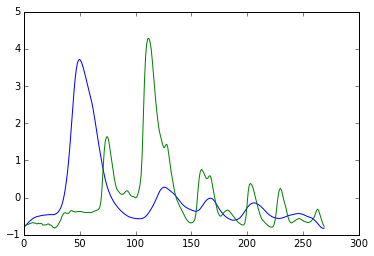

In [7]:
pylab.figure()
plt = pylab.plot(numpy.arange(s_x.shape[0]), s_x)
plt2 = pylab.plot(numpy.arange(s_y.shape[0]), s_y)

Then, we compute p-DTW for gamma=0 (i.e. standard DTW) and plot obtained path.

gamma=0.00, Cost: 456.11
This cost is very large when compared to the following ones: there must be a bug somewhere


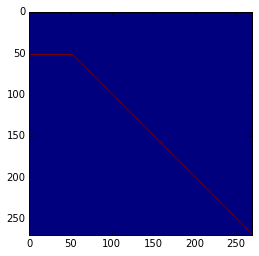

In [8]:
gamma = 0.
cost, probas = p_dtw(s_x=s_x.reshape((-1, 1)), s_y=s_y.reshape((-1, 1)), gamma=gamma)
print("gamma=%.2f, Cost: %.2f" % (gamma, cost))
print("This cost is very large when compared to the following ones: there must be a bug somewhere")
m = p_dtw_backtrace(probas)
im = pylab.imshow(m)

Finally, for growing gamma:

gamma=1.00, Cost: 126.59


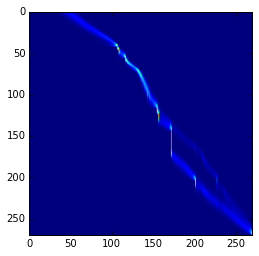

In [9]:
gamma = 1.
cost, probas = p_dtw(s_x=s_x.reshape((-1, 1)), s_y=s_y.reshape((-1, 1)), gamma=gamma)
print("gamma=%.2f, Cost: %.2f" % (gamma, cost))
m = p_dtw_backtrace(probas)
im = pylab.imshow(m)

gamma=10.00, Cost: 243.59


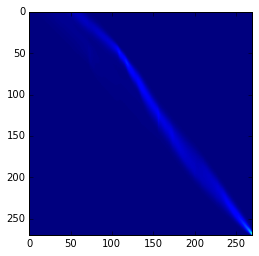

In [10]:
gamma = 10.
cost, probas = p_dtw(s_x=s_x.reshape((-1, 1)), s_y=s_y.reshape((-1, 1)), gamma=gamma)
print("gamma=%.2f, Cost: %.2f" % (gamma, cost))
m = p_dtw_backtrace(probas)
im = pylab.imshow(m)

gamma=100.00, Cost: 342.94


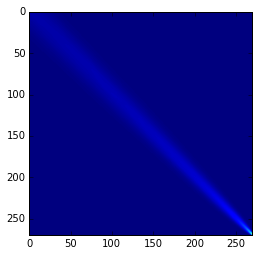

In [11]:
gamma = 100.
cost, probas = p_dtw(s_x=s_x.reshape((-1, 1)), s_y=s_y.reshape((-1, 1)), gamma=gamma)
print("gamma=%.2f, Cost: %.2f" % (gamma, cost))
m = p_dtw_backtrace(probas)
im = pylab.imshow(m)